Epoch 1/100
17/17 [==============================] - 3s 41ms/step - loss: 24606812.0000 - mae: 4580.6943 - mse: 24606812.0000 - val_loss: 22103392.0000 - val_mae: 4288.9141 - val_mse: 22103392.0000
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 24450856.0000 - mae: 4564.2202 - mse: 24450856.0000 - val_loss: 21826564.0000 - val_mae: 4258.1890 - val_mse: 21826564.0000
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 23867516.0000 - mae: 4504.0400 - mse: 23867516.0000 - val_loss: 20905510.0000 - val_mae: 4158.0972 - val_mse: 20905510.0000
Epoch 4/100
17/17 [==============================] - 0s 12ms/step - loss: 22169020.0000 - mae: 4328.4688 - mse: 22169020.0000 - val_loss: 18508240.0000 - val_mae: 3894.7112 - val_mse: 18508240.0000
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 18186294.0000 - mae: 3891.6711 - mse: 18186294.0000 - val_loss: 13697149.0000 - val_mae: 3310.3059 - val_mse: 13697149.0000
Epoch 6/100


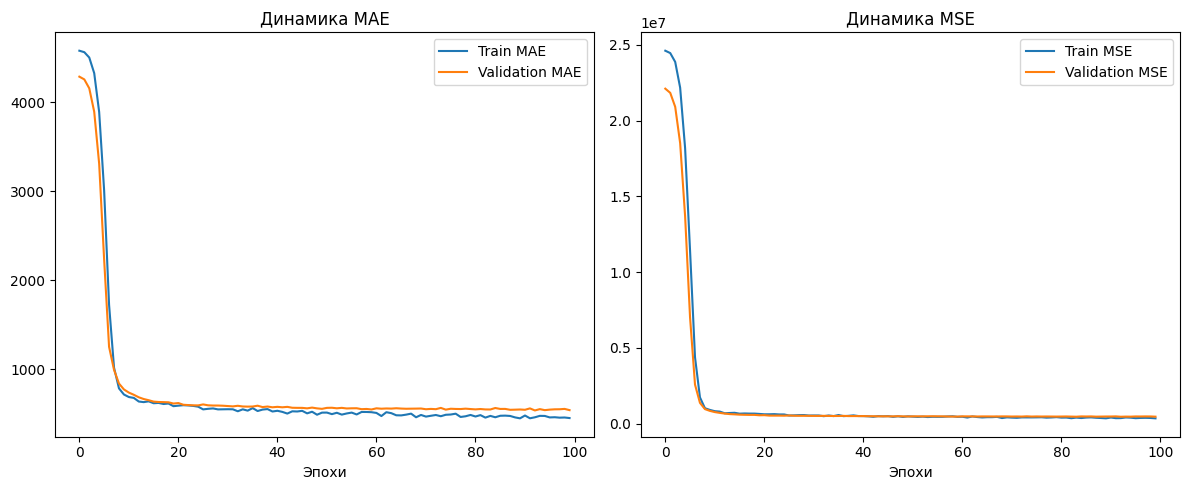

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

# 1. Загрузка и подготовка данных
df = pd.read_csv('day.csv')
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Обработка категориальных признаков
categorical_cols = ['season', 'mnth', 'weathersit', 'weekday']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Разделение и нормализация
X = df.drop('cnt', axis=1).values
y = df['cnt'].values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# 3. Архитектура модели
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# 4. Компиляция с пользовательскими метриками
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[metrics.MeanAbsoluteError(name='mae'), metrics.MeanSquaredError(name='mse')]
)

# 5. Обучение с таймером
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.15,
    verbose=1
)
training_time = time.time() - start_time

# 6. Детальная оценка
results = model.evaluate(X_test, y_test, verbose=0)
test_mae, test_mse = results[1], results[2]

print(f'''
╭{'─'*43}╮
│ Результаты обучения (100 эпох)       │
├{'─'*43}┤
│ Время обучения:   {training_time:.2f} сек       │
│ Тестовый MAE:     {test_mae:.2f}            │
│ Тестовый MSE:     {test_mse:.2f}         │
╰{'─'*43}╯
''')

# 7. Визуализация прогресса обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Динамика MAE')
plt.xlabel('Эпохи')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Динамика MSE')
plt.xlabel('Эпохи')
plt.legend()
plt.tight_layout()
plt.show()
